In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
import random

# Load Netowrk
import json

with open('Network.json', 'r') as infile:
    json_dict = json.load(infile)

G = nx.node_link_graph(json.loads(json_dict))

In [4]:
# Function to calculate fraction for edges between similar nodes (same field)

def fraction_similar_edges(G):
    
    n_edges_similar = 0
    for edge in G.edges:
        if G.nodes[edge[0]]['field'] == G.nodes[edge[1]]['field']:
            n_edges_similar += 1

    return n_edges_similar / G.number_of_edges()



#### E 1

In [5]:
# Shuffle field labels

G_shuffled = G.copy()

# Get all possible fields

possible_fields = []
for node in G_shuffled.nodes:
    if G_shuffled.nodes[node]['field'] not in possible_fields:
        possible_fields.append(G_shuffled.nodes[node]['field'])



for node in G_shuffled.nodes:
    G_shuffled.nodes[node]['field'] = random.choice(possible_fields)


In [6]:
# Print fraction of edges between similar nodes

print(f"possible_fields: {possible_fields}")
print('Fraction of edges between similar nodes (original):', fraction_similar_edges(G))
print('Fraction of edges between similar nodes (shuffled):', fraction_similar_edges(G_shuffled))

possible_fields: ['Business', 'No Field', 'Computer Science', 'Physics', 'Economics', 'Medicine', 'Political Science', 'Psychology', 'Sociology', 'Mathematics']
Fraction of edges between similar nodes (original): 0.646
Fraction of edges between similar nodes (shuffled): 0.09914285714285714


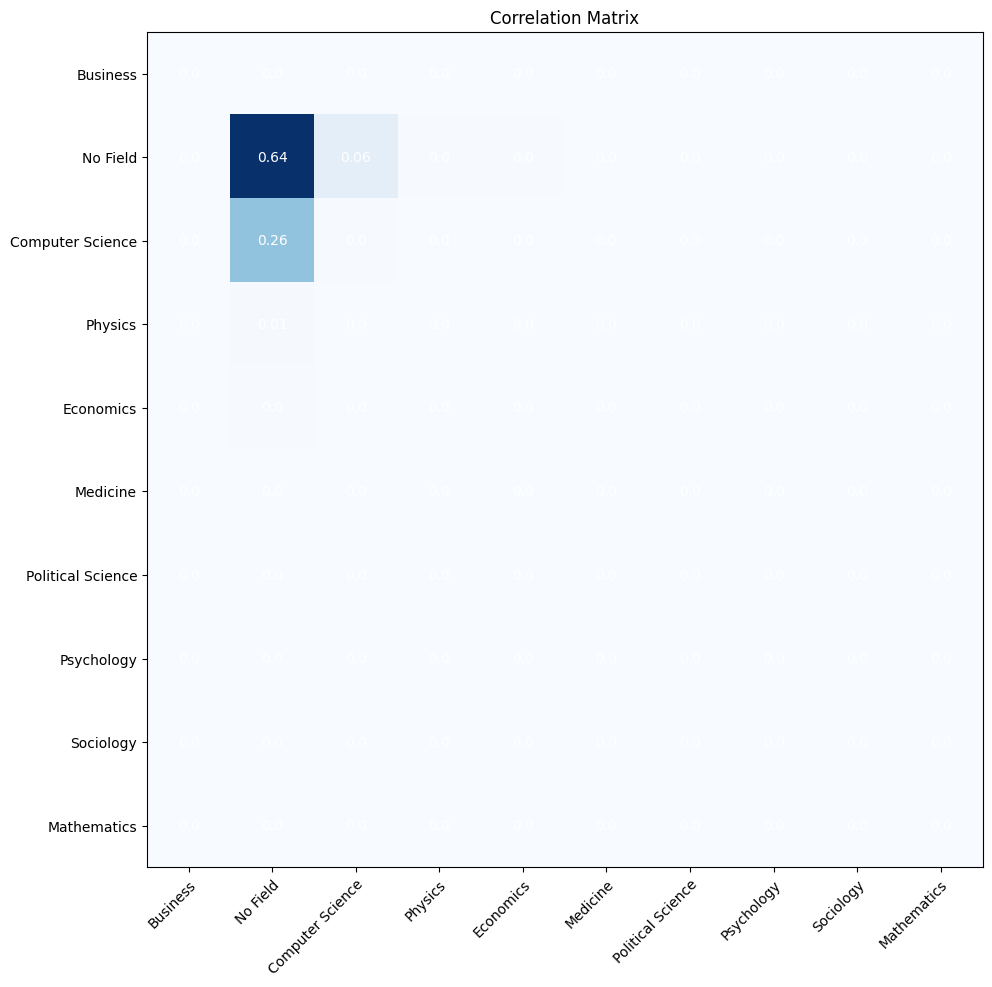

In [7]:
# Compute Parameters correlation matrix

field_inx = {key : idx for idx, key in enumerate(possible_fields)}

corr_matrix = np.zeros((len(possible_fields), len(possible_fields)))

for edge in G.edges:
    corr_matrix[field_inx[G.nodes[edge[0]]['field']], field_inx[G.nodes[edge[1]]['field']]] += 1

corr_matrix = corr_matrix / np.sum(corr_matrix)

# Plot correlation matrix

fig, ax = plt.subplots(figsize=(10, 10))

im = ax.imshow(corr_matrix, cmap='Blues')

# Show all ticks and label them with the respective list entries

ax.set_xticks(np.arange(len(possible_fields)))
ax.set_yticks(np.arange(len(possible_fields)))
ax.set_xticklabels(possible_fields)
ax.set_yticklabels(possible_fields)

# Rotate the tick labels and set their alignment.

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

# Loop over data dimensions and create text annotations.

for i in range(len(possible_fields)):
    for j in range(len(possible_fields)):
        text = ax.text(j, i, round(corr_matrix[i, j],2),
                       ha="center", va="center", color="w")


ax.set_title("Correlation Matrix")
fig.tight_layout()
plt.show()



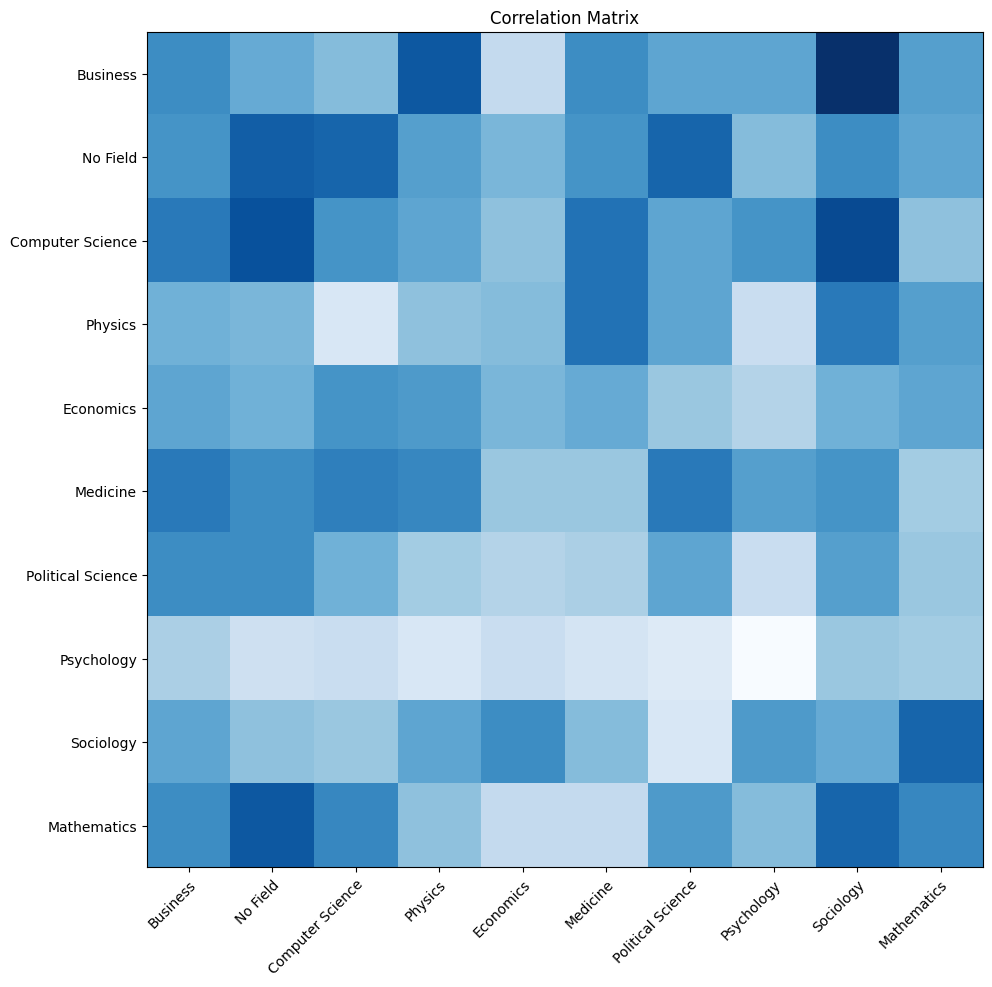

In [8]:
# Compute Parameters correlation matrix

field_inx = {key : idx for idx, key in enumerate(possible_fields)}

corr_matrix = np.zeros((len(possible_fields), len(possible_fields)))

for edge in G_shuffled.edges:
    corr_matrix[field_inx[G_shuffled.nodes[edge[0]]['field']], field_inx[G_shuffled.nodes[edge[1]]['field']]] += 1

corr_matrix = corr_matrix / np.sum(corr_matrix)

# Plot correlation matrix

fig, ax = plt.subplots(figsize=(10, 10))

im = ax.imshow(corr_matrix, cmap='Blues')

# Show all ticks and label them with the respective list entries

ax.set_xticks(np.arange(len(possible_fields)))
ax.set_yticks(np.arange(len(possible_fields)))
ax.set_xticklabels(possible_fields)
ax.set_yticklabels(possible_fields)

# Rotate the tick labels and set their alignment.

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    
ax.set_title("Correlation Matrix")
fig.tight_layout()
plt.show()


In [9]:
anode_names = [node for node in G.nodes]

#### Ex 3.

In [11]:
karate_club_graph = nx.karate_club_graph()


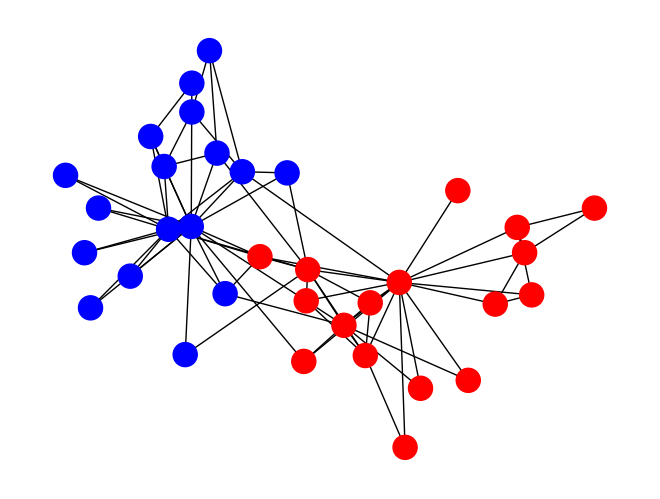

In [12]:
unique_clubs = set([karate_club_graph.nodes[node]['club'] for node in karate_club_graph.nodes])

color_map = {unique_clubs.pop() : 'red', unique_clubs.pop() : 'blue'}

nx.draw(karate_club_graph, node_color=[color_map[karate_club_graph.nodes[node]['club']] for node in karate_club_graph.nodes])

In [13]:
# Define a function to calculate modularity from a given partition

def modularity(G, partition):

    L = G.number_of_edges()
    
    M = 0

    for community in partition:
        G_C = G.subgraph(community).copy()
        L_C = G_C.number_of_edges()
        # Degrees of nodes in community or in Total Graph?
        k_c = sum([G_C.degree(node) for node in G_C.nodes])

        M_C = L_C / L - (k_c / (2 * L))**2
        M += M_C
    
    return M

In [14]:
C1 = [node for node in karate_club_graph.nodes if karate_club_graph.nodes[node]['club'] == 'Mr. Hi']
C2 = [node for node in karate_club_graph.nodes if karate_club_graph.nodes[node]['club'] == 'Officer']

print('Modularity of original partition:', modularity(karate_club_graph, [C1, C2]))

Modularity of original partition: 0.48931623931623935


In [60]:
# Define double edge swap function

def double_edge_swap(G, n_swap=100):
    G_swapped = G.copy()
    for swap in range(n_swap):
        # Get random edge
        edge1,edge2 = random.sample(list(G_swapped.edges),2)
        

        u,v = edge1
        x,y = edge2


        # Check swap is valid
        if u == y or v == x: 
            continue

        # Check if new edges already exist
        if G_swapped.has_edge(u,y) or G_swapped.has_edge(v,x):
            continue

        # Remove edge
        G_swapped.remove_edge(u,v)
        G_swapped.remove_edge(x,y)

        # Add new edges
        G_swapped.add_edge(u,y)
        G_swapped.add_edge(x,v)

    return G_swapped



In [61]:
karate_swapped = double_edge_swap(karate_club_graph, n_swap=100)
print(all([karate_club_graph.degree(node) == karate_swapped.degree(node) for node in karate_club_graph.nodes]))

True


In [65]:
# Define function for randomized version of double edge swap modularity

def ex_modularity(G, n_swap=100, experiments=1000):

    modularity_values = []

    for experiment in range(experiments):
        G_swapped = double_edge_swap(G, n_swap=n_swap)
        C1 = [node for node in G_swapped.nodes if G_swapped.nodes[node]['club'] == 'Mr. Hi']
        C2 = [node for node in G_swapped.nodes if G_swapped.nodes[node]['club'] == 'Officer']
        modularity_values.append(modularity(G_swapped, [C1, C2]))

    return modularity_values

In [83]:
modularity_values = ex_modularity(karate_club_graph, n_swap=1000, experiments=1000)

In [84]:
len(modularity_values)

1000

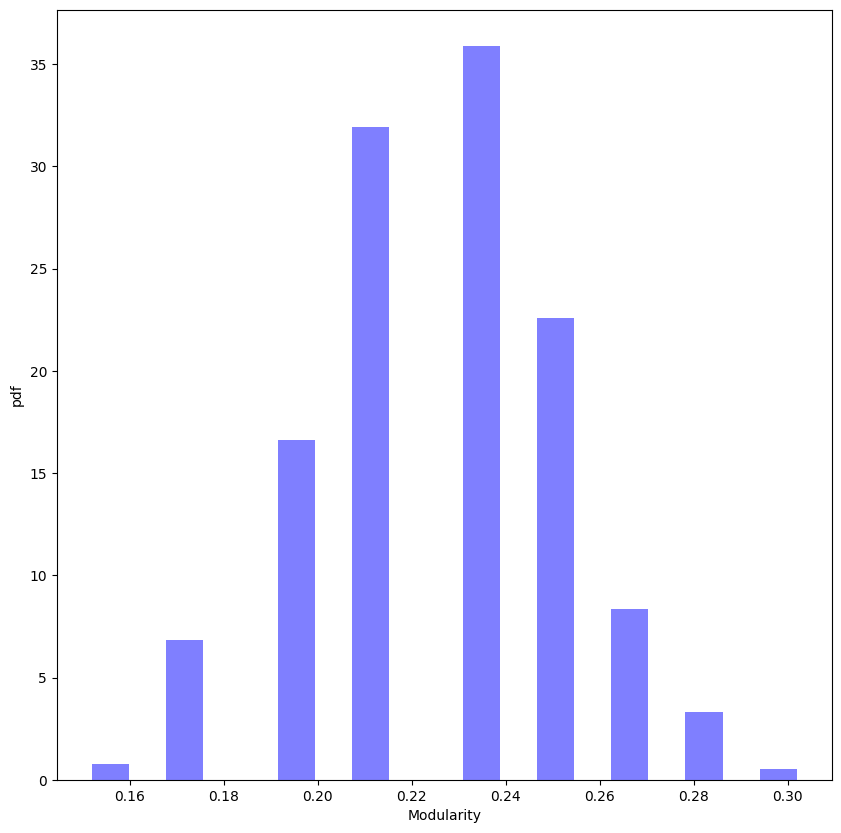

In [85]:
# plot histogram of modularity values

bins = np.linspace(min(modularity_values), max(modularity_values), 20)
hist, edges = np.histogram(modularity_values, bins=bins, density=True)
x = (edges[:-1] + edges[1:]) / 2
width = bins[1] - bins[0]

fig , ax = plt.subplots(figsize=(10, 10))

ax.bar(x, hist, width=width, color='blue', alpha=0.5)

plt.xlabel('Modularity')
plt.ylabel('pdf')

plt.show()




#### Ex 4.

a